<a href="https://colab.research.google.com/github/AlbertoMartinezS/idal_ia3/blob/main/EjercicioDLTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Lambda
import matplotlib.pyplot as plt
import pandas as pd


In [331]:
dataTest = pd.read_csv("test.csv")
dataTrain= pd.read_csv("train.csv")

In [332]:
dataTest.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,179.000000,140.000000,179.000000,179.000000,179.000000
mean,434.748603,33.081571,0.446927,0.335196,33.101512
std,259.141297,15.059700,1.065933,0.741575,46.759675
min,3.000000,0.920000,0.000000,0.000000,0.000000
25%,227.000000,22.750000,0.000000,0.000000,7.895800
50%,421.000000,30.000000,0.000000,0.000000,13.791700
75%,651.000000,42.000000,1.000000,0.000000,31.000000
max,885.000000,74.000000,8.000000,5.000000,263.000000


In [333]:
dataTrain.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,711.000000,573.000000,711.000000,711.000000,711.000000
mean,448.981716,28.845986,0.542897,0.393812,31.973669
std,257.156506,14.282324,1.112314,0.821998,50.468437
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,19.000000,0.000000,0.000000,7.925000
50%,458.000000,28.000000,0.000000,0.000000,14.458300
75%,675.500000,36.500000,1.000000,0.000000,30.847900
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [334]:
dataTest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,840,Yes,Upper,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,Cherbourg
1,579,No,Lower,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,Cherbourg
2,253,No,Upper,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,Southampton
3,612,No,Lower,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,Southampton
4,12,Yes,Upper,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,Southampton


In [335]:
dataTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,413,Yes,Upper,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Queenstown
1,92,No,Lower,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,Southampton
2,724,No,Middle,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,Southampton
3,312,Yes,Upper,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,Cherbourg
4,723,No,Middle,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,Southampton


In [336]:
dataTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,413,Yes,Upper,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Queenstown
1,92,No,Lower,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,Southampton
2,724,No,Middle,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,Southampton
3,312,Yes,Upper,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,Cherbourg
4,723,No,Middle,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
706,546,No,Upper,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,Southampton
707,714,No,Lower,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,Southampton
708,239,No,Middle,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,Southampton
709,746,No,Upper,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,Southampton


In [337]:
dataTrain["Age"] = dataTrain["Age"].fillna(dataTrain["Age"].mean())
dataTrain["Sex"]= dataTrain["Sex"].map({"female": 0,
                                  "male": 1})
dataTrain["Survived"]= dataTrain["Survived"].map({"Yes": 1,
                                  "No": 0})
dataTrain["Pclass"]= dataTrain["Pclass"].map({"Lower": 0,
                                  "Middle": 1,
                                  "Upper": 2})
dataTrain["Embarked"]= dataTrain["Embarked"].map({"Queenstown": 1,
                                  "Southampton": 2,
                                  "Cherbourg": 3})


dataTest["Age"] = dataTest["Age"].fillna(dataTest["Age"].mean())
dataTest["Sex"]= dataTest["Sex"].map({"female": 0,
                                  "male": 1})
dataTest["Survived"]= dataTest["Survived"].map({"Yes": 1,
                                  "No": 0})
dataTest["Pclass"]= dataTest["Pclass"].map({"Lower": 0,
                                  "Middle": 1,
                                  "Upper": 2})
dataTest["Embarked"]= dataTest["Embarked"].map({"Queenstown": 1,
                                  "Southampton": 2,
                                  "Cherbourg": 3})

In [338]:
dataTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,413,1,2,"Minahan, Miss. Daisy E",0,33.0,1,0,19928,90.0000,C78,1
1,92,0,0,"Andreasson, Mr. Paul Edvin",1,20.0,0,0,347466,7.8542,NaN,2
2,724,0,1,"Hodges, Mr. Henry Price",1,50.0,0,0,250643,13.0000,NaN,2
3,312,1,2,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,3
4,723,0,1,"Gillespie, Mr. William Henry",1,34.0,0,0,12233,13.0000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
706,546,0,2,"Nicholson, Mr. Arthur Ernest",1,64.0,0,0,693,26.0000,NaN,2
707,714,0,0,"Larsson, Mr. August Viktor",1,29.0,0,0,7545,9.4833,NaN,2
708,239,0,1,"Pengelly, Mr. Frederick William",1,19.0,0,0,28665,10.5000,NaN,2
709,746,0,2,"Crosby, Capt. Edward Gifford",1,70.0,1,1,WE/P 5735,71.0000,B22,2


In [339]:

dataTrain= dataTrain.drop(["Cabin"], axis=1)
dataTrain= dataTrain.drop(["Name"], axis=1)
dataTrain= dataTrain.drop(["PassengerId"], axis=1)
dataTrain= dataTrain.drop(["Ticket"], axis=1)


dataTest= dataTest.drop(["Cabin"], axis=1)
dataTest= dataTest.drop(["Name"], axis=1)
dataTest= dataTest.drop(["PassengerId"], axis=1)
dataTest= dataTest.drop(["Ticket"], axis=1)



In [340]:
dataTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,33.0,1,0,90.0000,1
1,0,0,1,20.0,0,0,7.8542,2
2,0,1,1,50.0,0,0,13.0000,2
3,1,2,0,18.0,2,2,262.3750,3
4,0,1,1,34.0,0,0,13.0000,2
...,...,...,...,...,...,...,...,...
706,0,2,1,64.0,0,0,26.0000,2
707,0,0,1,29.0,0,0,9.4833,2
708,0,1,1,19.0,0,0,10.5000,2
709,0,2,1,70.0,1,1,71.0000,2


In [341]:
dataTrain_= dataTrain.dropna()
dataTest_ = dataTest.dropna()

In [342]:
for col in ["Pclass", "SibSp", "Parch"]:
  mean= dataTrain_[col].mean()
  std= dataTrain_[col].std()
  dataTrain_[col]= (dataTrain_[col]-mean)/std
  dataTest_[col]= (dataTest_[col]-mean)/std

In [343]:
x_tr = dataTrain_.drop(["Survived"], axis=1)
x_ts = dataTest_.drop(["Survived"], axis=1)

y_tr = dataTrain_["Survived"]
y_ts = dataTest_["Survived"]

In [359]:
# Algunos hiper-parámetros
lr = .001
batch_size = 512
n_epochs = 50
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Crear modelo
#    

model= tf.keras.models.Sequential()
model.add(Dense(units= 256, activation= 'relu', input_shape= (x_tr.shape[1],), kernel_regularizer =tf.keras.regularizers.l2(0.01)))
model.add(Dense(128, activation= 'relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)))
model.add(Dense(64, activation= 'relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)))
model.add(Dense(32, activation= 'relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)))
model.add(Dense(1, activation= 'sigmoid'))
# Visualizar arquitectura y dimensiones
model.summary()

# Compilamos el modelo: ¿Qué función de coste hay que utilizar?
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               2048      
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 dense_79 (Dense)            (None, 1)                 33        
                                                                 
Total params: 45,313
Trainable params: 45,313
Non-trainable params: 0
_________________________________________________________________


In [360]:
hist = model.fit(x_tr, 
                 y_tr, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                 validation_data=(x_ts, y_ts))

Epoch 1/50
2/2 [==============================] - 1s 187ms/step - loss: 6.2830 - accuracy: 0.3840 - val_loss: 4.2638 - val_accuracy: 0.3855
Epoch 2/50
2/2 [==============================] - 0s 23ms/step - loss: 4.1247 - accuracy: 0.3840 - val_loss: 3.8265 - val_accuracy: 0.3017
Epoch 3/50
2/2 [==============================] - 0s 23ms/step - loss: 3.7696 - accuracy: 0.3277 - val_loss: 3.5844 - val_accuracy: 0.6704
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 3.5722 - accuracy: 0.6639 - val_loss: 3.4609 - val_accuracy: 0.6983
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 3.4824 - accuracy: 0.6850 - val_loss: 3.3856 - val_accuracy: 0.6983
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 3.4037 - accuracy: 0.6779 - val_loss: 3.3321 - val_accuracy: 0.6760
Epoch 7/50
2/2 [==============================] - 0s 23ms/step - loss: 3.3389 - accuracy: 0.6709 - val_loss: 3.2728 - val_accuracy: 0.6760
Epoch 8/50
2/2 [==========

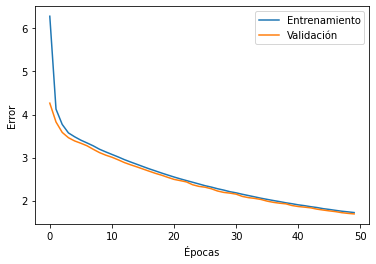

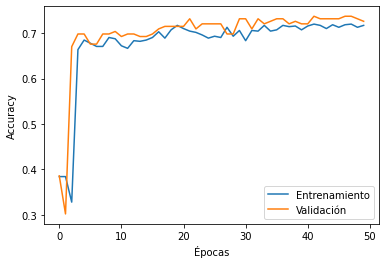

In [361]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)